In [44]:
import pandas as pd
import re
import matplotlib.pyplot as plt
blue    = '#008fd5'
red     = '#fc4f30'
yellow  = '#e5ae37'
green   = '#6d904f'
skye    = '#33D1FF'
dred    = 'r'
pink    = "#FF338A"
lgreen  = '#99FF33'
colors = [blue, green, red, yellow, skye, dred, lgreen, pink]

plt.rcParams['figure.figsize'] = [10, 7]

df = pd.read_csv("covid19_Donors.csv")

In [2]:
df.head()

,funder_name,city,state,country,value_granted,no_of_grants
0,Jack Dorsey,San Francisco,CA,United States,$1 Billion,1
1,Google.Org Contributions Program,Mountain View,CA,United States,$957.8 Million,16
2,Bill & Melinda Gates Foundation,Seattle,WA,United States,$305 Million,5
3,Itau Unibanco Holding S.A.,Sao Paulo,NaN,Brazil,$239.8 Million,1
4,Visa Foundation,San Francisco,CA,United States,$210 Million,2


## Ceaning Data
* value_grante to only values
* check and drop record if country is not provided
* check and drop record if no_of_grants is < 0

In [3]:
df.isna().sum()

funder_name        0
city              18
state            158
country            0
value_granted      0
no_of_grants       0
dtype: int64

In [4]:
df.state.value_counts().head(10)

CA    63
NY    48
IL    19
NJ    17
TX    17
GA    16
MN    16
PA    15
NC    14
OH    13
Name: state, dtype: int64

## State Column and City Column
* From the above, it is obvious the there is a lot of missing values in the `State field`
* I can drop the state column or leave it. Here, I will leave it.
* The `city` missing values in not much so we can leave it

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   funder_name    509 non-null    object
 1   city           491 non-null    object
 2   state          351 non-null    object
 3   country        509 non-null    object
 4   value_granted  509 non-null    object
 5   no_of_grants   509 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 14.0+ KB


## Value_granted
* Check want prefix there is in the Value_granted
* Clean data using prefix keyword

In [6]:
# Clear we see we only have M, B and 0 where M is million and B is billion
check = df["value_granted"].apply(lambda x: re.findall(r"[a-zA-Z]", x)[0]  if  re.findall(r"[a-zA-Z]", x) else 0)
check.value_counts()

M    367
0    141
B      1
Name: value_granted, dtype: int64

In [7]:
df["value_granted"] = df.value_granted.apply(lambda x: x.replace("$", "").replace(",",""))

In [8]:
def convert(x):
    if "B" in x:
        return round(float(x.replace("Billion",""))*1000000000, 2)
    elif  "M" in x:
        return round(float(x.replace("Million",""))*1000000, 2)
    else:
        return round(float(x), 2)

df["value_granted"] = df["value_granted"].apply(convert)

df.to_csv("covid19_donors_data_cleaned")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   funder_name    509 non-null    object 
 1   city           491 non-null    object 
 2   state          351 non-null    object 
 3   country        509 non-null    object 
 4   value_granted  509 non-null    float64
 5   no_of_grants   509 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 16.0+ KB


Graph for state: 20


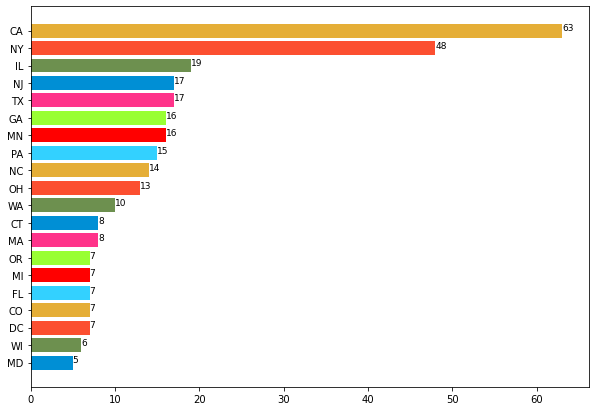

Graph for city: 20


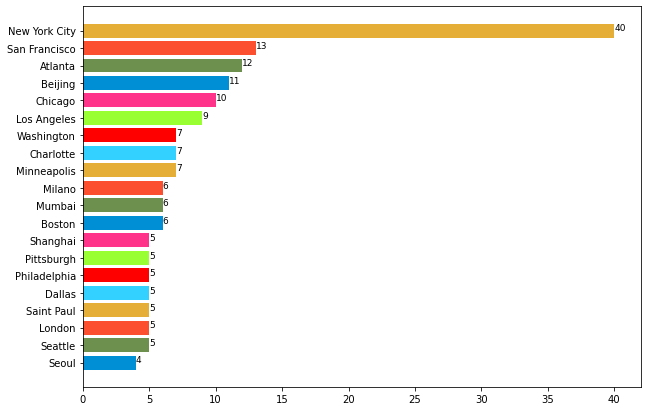

Graph for country: 20


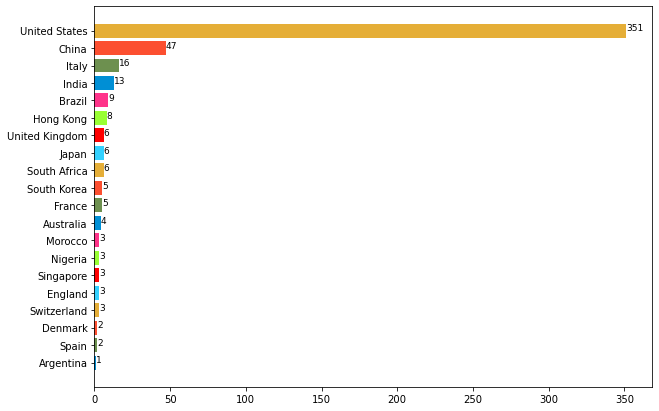

In [28]:
df_col =df[["state", "city", "country"]]
for i in df_col.columns:
    val = df[i].value_counts().sort_values()
    if len(val) >=20:
        val = df[i].value_counts()[:20].sort_values()

    print(f"Graph for {i}: {len(val)}")
    plt.barh( val.index, val,  color=colors)

    for index, value in enumerate(val):
        s = '{:.0f}'.format(value)
        plt.text(value, index, str(s), fontsize=9)

    plt.show()

In [43]:
pd.pivot_table(df[df["country"] == "Nigeria"], index=[ "funder_name", "city"], values=["value_granted"]).sort_values("value_granted", ascending=False).head()

,,value_granted
funder_name,city,
United Bank for Africa Foundation,Lagos,14000000.0
Dangote Foundation,Ikoyi,4300000.0
Bua Group,Lagos,3300000.0
